In [2]:
import numpy as np
import matplotlib.pyplot as plt
from diskprojection import disk_observation

HD163296_13CO = disk_observation('/data/shared/HD163296_MAPS/HD_163296_13CO_220GHz.robust_0.5.clean.JvMcorr.image.pbcor.fits')
#note that chans does NOT correspond to the channel maps
HD163296_13CO.get_emission_surface_diagnostic(inc=46.7, PA=313.3, chans = [60, 62], r_max = 5)

Using 5.06 km/s to 5.46 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


(array([4.99851414, 4.93275035, 4.83219607, 4.81013461, 4.76834313,
        4.67582377, 4.66207788, 4.64212992, 4.65855871, 4.51235647,
        4.45152861, 4.54233399, 4.48432066, 4.45445149, 4.43947572,
        4.23039886, 4.27989009, 4.11481067, 3.97131185, 3.95172203,
        3.90798935, 3.88579894, 3.86608761, 3.77552266, 3.93052166,
        3.77426412, 3.75535213, 4.12437062, 3.77535055, 3.21400462,
        3.19562685, 3.17566228, 3.37448721, 3.35582537, 3.34786507,
        3.09992056, 3.15725666, 3.13883252, 3.04123853, 3.0175494 ,
        2.9018117 , 2.88231004, 2.86281525, 2.66156796, 2.64165555,
        2.62174446, 2.60048609, 2.591789  , 2.68179387, 2.5836297 ,
        2.52813136, 2.58375597, 2.42937453, 2.79211059, 2.38292762,
        2.33656066, 2.55838947, 2.54820291, 2.20398367, 2.17704288,
        2.36154655, 2.42152704, 2.39011698, 3.03575353, 2.09044101,
        2.51787206, 2.23648932, 1.95455325, 1.93542719, 1.91631897,
        1.69976043, 1.72160027, 1.82542931, 1.81

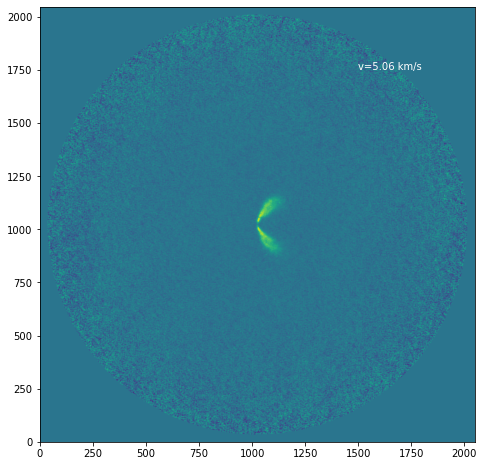

In [2]:
plt.figure(figsize = (8,8))
plt.imshow(HD163296_13CO.rotated[0], origin='lower')
plt.text(1500, 1750, "v=%.2f km/s" % (HD163296_13CO.velax[60]/1000,), color='w')
plt.show()

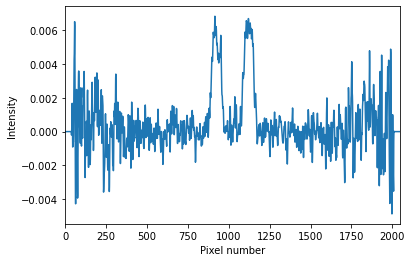

In [3]:
profile = HD163296_13CO.rotated[0][:, 1100]
plt.plot(np.arange(0, HD163296_13CO.rotated.shape[1]), profile)
plt.xlabel('Pixel number')
plt.ylabel('Intensity')
plt.xlim(left= 0, right = HD163296_13CO.rotated.shape[2])
plt.show()

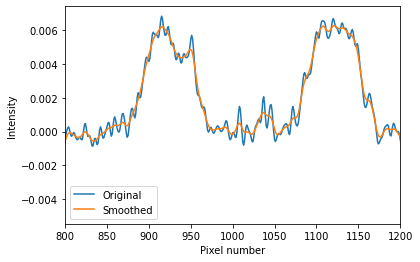

In [4]:
from astropy.convolution import convolve, Gaussian1DKernel

smooth = 1.

kernel = Gaussian1DKernel((smooth * HD163296_13CO.bmaj) / HD163296_13CO.dpix / 2.235)

smoothed_profile = convolve(profile, kernel, boundary = 'wrap')

plt.plot(np.arange(0, HD163296_13CO.rotated.shape[1]), profile, label='Original')
plt.plot(np.arange(0, HD163296_13CO.rotated.shape[1]), smoothed_profile, label='Smoothed')
plt.legend()
plt.xlabel('Pixel number')
plt.ylabel('Intensity')
plt.xlim(left= 800, right = 1200)
plt.show()

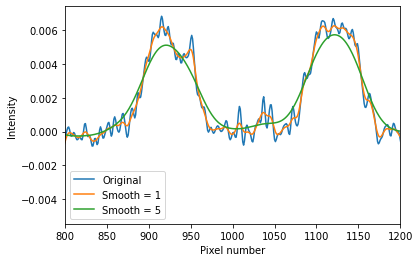

In [5]:
smooth = 5.

kernel2 = Gaussian1DKernel((smooth * HD163296_13CO.bmaj) / HD163296_13CO.dpix / 2.235)

smoothed_profile2 = convolve(profile, kernel2, boundary = 'wrap')

plt.plot(np.arange(0, HD163296_13CO.rotated.shape[1]), profile, label='Original')
plt.plot(np.arange(0, HD163296_13CO.rotated.shape[1]), smoothed_profile, label='Smooth = 1')
plt.plot(np.arange(0, HD163296_13CO.rotated.shape[1]), smoothed_profile2, label='Smooth = 5')
plt.legend()
plt.xlabel('Pixel number')
plt.ylabel('Intensity')
plt.xlim(left= 800, right = 1200)
plt.show()

In [6]:
HD163296_13CO = disk_observation('/data/shared/HD163296_MAPS/HD_163296_13CO_220GHz.robust_0.5.clean.JvMcorr.image.pbcor.fits')
#note that chans does NOT correspond to the channel maps
HD163296_13CO.get_emission_surface_diagnostic(inc=46.7, PA=313.3, chans = [28, 98], r_max = 5, smooth=2,
                                              directory='/data/shared/diskprojectiontest/HD163296_13CO_smooth2')

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


(array([4.92318159, 4.82379318, 4.82194022, ..., 4.64237461, 4.75151577,
        4.72523266]),
 array([-24.3070379 ,  25.61239041,  24.74673559, ..., -25.21391438,
        -25.00780609, -25.65361207]),
 array([0.00420728, 0.005608  , 0.00431162, ..., 0.00479157, 0.00513022,
        0.00551217]),
 array([-1340.00001332, -1340.00001332, -1340.00001332, ...,
        12659.99998648, 12659.99998648, 12659.99998648]),
 array([ 781.,  783.,  784., ..., 1252., 1256., 1259.]),
 array([ 110., 1968., 1943., ...,  134.,   80.,   77.]),
 array([ 168., 1943., 1905., ...,   78.,  147.,  103.]))

In [7]:
HD163296_CO = disk_observation('/data/shared/HD163296_MAPS/HD_163296_CO_220GHz.robust_0.5.clean.JvMcorr.image.pbcor.fits')
#note that chans does NOT correspond to the channel maps
HD163296_CO.get_emission_surface_diagnostic(inc=46.7, PA=313.3, chans = [28, 98], r_max = 5, smooth=2,
                                              directory='/data/shared/diskprojectiontest/HD163296_CO_smooth2')

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


IndexError: index -2 is out of bounds for axis 0 with size 1

In [8]:
HD163296_C18O = disk_observation('/data/shared/HD163296_MAPS/HD_163296_C18O_220GHz.robust_0.5.clean.JvMcorr.image.pbcor.fits')
#note that chans does NOT correspond to the channel maps
HD163296_C18O.get_emission_surface_diagnostic(inc=46.7, PA=313.3, chans = [28, 98], r_max = 5, smooth=2,
                                              directory='/data/shared/diskprojectiontest/HD163296_C18O_smooth2')

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


(array([4.99480154, 4.97506205, 4.95770532, ..., 4.85150979, 4.81638288,
        4.85844022]),
 array([-25.61239041, -25.61239041, -25.62613096, ...,  24.85666001,
         25.91468257,  25.15895217]),
 array([0.00475131, 0.00475593, 0.00515599, ..., 0.00400634, 0.00309929,
        0.00421495]),
 array([-1340.0000306 , -1340.0000306 , -1340.0000306 , ...,
        12659.99996547, 12659.99996547, 12659.99996547]),
 array([ 777.,  778.,  779., ..., 1260., 1264., 1265.]),
 array([  64.,   64.,   63., ..., 1891., 1958., 1957.]),
 array([ 119.,  119.,  119., ..., 1965., 1975., 1921.]))

In [9]:
HD163296_HCN = disk_observation('/data/shared/HD163296_MAPS/HD_163296_HCN_260GHz_hf1.robust_0.5.clean.JvMcorr.image.pbcor.fits')
#note that chans does NOT correspond to the channel maps
HD163296_HCN.get_emission_surface_diagnostic(inc=46.7, PA=313.3, chans = [28, 98], r_max = 5, smooth=2,
                                              directory='/data/shared/diskprojectiontest/HD163296_HCN_smooth2')

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


(array([4.97943283, 4.97273245, 4.89488887, ..., 4.84266072, 4.97580993,
        4.99615292]),
 array([-19.52532552, -19.66273105, -20.28105593, ..., -19.25051447,
         17.90394029, -20.58334809]),
 array([0.00401633, 0.00289762, 0.0035137 , ..., 0.00298836, 0.00326367,
        0.00286759]),
 array([-1340.00003626, -1340.00003626, -1340.00003626, ...,
        12659.99996466, 12659.99996466, 12659.99996466]),
 array([ 521.,  522.,  523., ..., 1009., 1011., 1017.]),
 array([  33.,   25.,   22., ...,   79., 1384.,   27.]),
 array([  81.,   79.,   37., ...,   55., 1454.,   10.]))

In [10]:
HD163296_C2H = disk_observation('/data/shared/HD163296_MAPS/HD_163296_C2H_260GHz_hf4.robust_0.5.clean.JvMcorr.image.pbcor.fits')
#note that chans does NOT correspond to the channel maps
HD163296_C2H.get_emission_surface_diagnostic(inc=46.7, PA=313.3, chans = [28, 98], r_max = 5, smooth=2,
                                              directory='/data/shared/diskprojectiontest/HD163296_C2H_smooth2')

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


IndexError: index -2 is out of bounds for axis 0 with size 1

In [3]:
HD163296_13CO_imsmooth = disk_observation('/data/shared/HD163296_MAPS/HD_163296_13CO_220GHz.0.2arcsec.clean.JvMcorr.image.pbcor.fits')
#note that chans does NOT correspond to the channel maps
HD163296_13CO_imsmooth.get_emission_surface_diagnostic(inc=46.7, PA=313.3, chans = [28, 98], r_max = 5, 
                                              directory='/data/shared/diskprojectiontest/HD163296_13CO_imsmooth', smooth = 0)

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


IndexError: index -2 is out of bounds for axis 0 with size 1

In [6]:
HD163296_C18O_imsmooth = disk_observation('/data/shared/HD163296_MAPS/HD_163296_C18O_220GHz.0.2arcsec.clean.JvMcorr.image.pbcor.fits')
#note that chans does NOT correspond to the channel maps
HD163296_C18O_imsmooth.get_emission_surface_diagnostic(inc=46.7, PA=313.3, chans = [28, 98], r_max = 5, 
                                              directory='/data/shared/diskprojectiontest/HD163296_C18O_imsmooth', smooth = 0)

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


IndexError: index -2 is out of bounds for axis 0 with size 1

In [4]:
HD163296_C2H_imsmooth = disk_observation('/data/shared/HD163296_MAPS/HD_163296_C2H_260GHz_hf4.0.2arcsec.clean.JvMcorr.image.pbcor.fits')
#note that chans does NOT correspond to the channel maps
HD163296_C2H_imsmooth.get_emission_surface_diagnostic(inc=46.7, PA=313.3, chans = [28, 98], r_max = 5, 
                                              directory='/data/shared/diskprojectiontest/HD163296_C2H_imsmooth', smooth = 0)

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


IndexError: index -2 is out of bounds for axis 0 with size 1

In [5]:
HD163296_CO_imsmooth = disk_observation('/data/shared/HD163296_MAPS/HD_163296_CO_220GHz.0.2arcsec.clean.JvMcorr.image.pbcor.fits')
#note that chans does NOT correspond to the channel maps
HD163296_CO_imsmooth.get_emission_surface_diagnostic(inc=46.7, PA=313.3, chans = [28, 98], r_max = 5, 
                                              directory='/data/shared/diskprojectiontest/HD163296_CO_imsmooth', smooth = 0)

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


IndexError: index -2 is out of bounds for axis 0 with size 1

In [7]:
HD163296_HCN_imsmooth = disk_observation('/data/shared/HD163296_MAPS/HD_163296_HCN_260GHz_hf1.0.2arcsec.clean.JvMcorr.image.pbcor.fits')
#note that chans does NOT correspond to the channel maps
HD163296_HCN_imsmooth.get_emission_surface_diagnostic(inc=46.7, PA=313.3, chans = [28, 98], r_max = 5, 
                                              directory='/data/shared/diskprojectiontest/HD163296_HCN_imsmooth', smooth = 0)

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


IndexError: index -2 is out of bounds for axis 0 with size 1